# Visualización

In [19]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import seaborn as sns
# Definir una paleta base
palette = sns.color_palette("Set3")  # Puedes cambiar "Set2" por otra paleta
# Aplicar la paleta a todos los gráficos por defecto
sns.set_palette(palette)

import warnings
warnings.filterwarnings("ignore")

In [2]:
def apertura_exploracion(csv):

    """ Función para leer csv, convertir a df y hacer una primera exploración."""
    
    try:
        # Convertir el csv a DataFrame
        df = pd.read_csv(f"../files/{csv}.csv")        

        # Muestro las primeras filas
        display(df.head())

        # Obtengo las listas
        print(f"-----\n\nEl DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n-----")

        # Consulto si hay filas duplicadas
        print(f"\nEl número de filas duplicadas es {df.duplicated().sum()}\n-----")

        # Muestro el tipo de dato y si hay nulos por cada columna
        print("\nInformación del DataFrame:")
        df.info()

        # Muestro las estadísticas de columnas numéricas
        print("-----\n\nEstadísticas descriptivas:")
        display(df.describe().T)

        # Me devuelve un df que tendré que igualar a una variable
        return df  

    # Excepciones en caso de no enconrar el archivo o de que haya un error
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo '../files/{csv}.csv'.")
        return None  
    
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None 
    

In [3]:
df = apertura_exploracion("Full Loyalty Program Clean Nonulls")

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Loyalty Status
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,Active
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,72421.0,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,Active
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,72421.0,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,Active
3,100428,2017,1,6,0,6,606,60.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,63478.0,Married,Aurora,5845.43,Standard,2012,8,NaN,NaN,Active
4,100550,2017,1,3,0,3,2037,203.0,0,0,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,54133.0,Married,Nova,7861.80,Standard,2013,2,NaN,NaN,Active


-----

El DataFrame tiene 207632 filas y 26 columnas.
-----

El número de filas duplicadas es 0
-----

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207632 entries, 0 to 207631
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               207632 non-null  int64  
 1   Year                         207632 non-null  int64  
 2   Month                        207632 non-null  int64  
 3   Flights Booked               207632 non-null  int64  
 4   Flights with Companions      207632 non-null  int64  
 5   Total Flights                207632 non-null  int64  
 6   Distance                     207632 non-null  int64  
 7   Points Accumulated           207632 non-null  float64
 8   Points Redeemed              207632 non-null  int64  
 9   Dollar Cost Points Redeemed  207632 non-null  int64  
 10  Country                      207632 non-null  

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,207632.0,549240.808411,258456.999580,100018.00,326707.00,549612.00,772019.00,999986.00
Year,207632.0,2017.536295,0.498682,2017.00,2017.00,2018.00,2018.00,2018.00
Month,207632.0,6.641394,3.448752,1.00,4.00,7.00,10.00,12.00
Flights Booked,207632.0,8.039050,4.668948,1.00,4.00,8.00,11.00,21.00
Flights with Companions,207632.0,2.015706,2.538359,0.00,0.00,1.00,4.00,11.00
Total Flights,207632.0,10.054756,5.807808,1.00,6.00,10.00,14.00,32.00
Distance,207632.0,2361.633876,1135.835170,90.00,1458.00,2298.00,3150.00,6293.00
Points Accumulated,207632.0,241.642600,116.118272,9.00,149.00,235.00,323.00,676.50
Points Redeemed,207632.0,59.968540,170.314671,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,207632.0,4.853655,13.775511,0.00,0.00,0.00,0.00,71.00


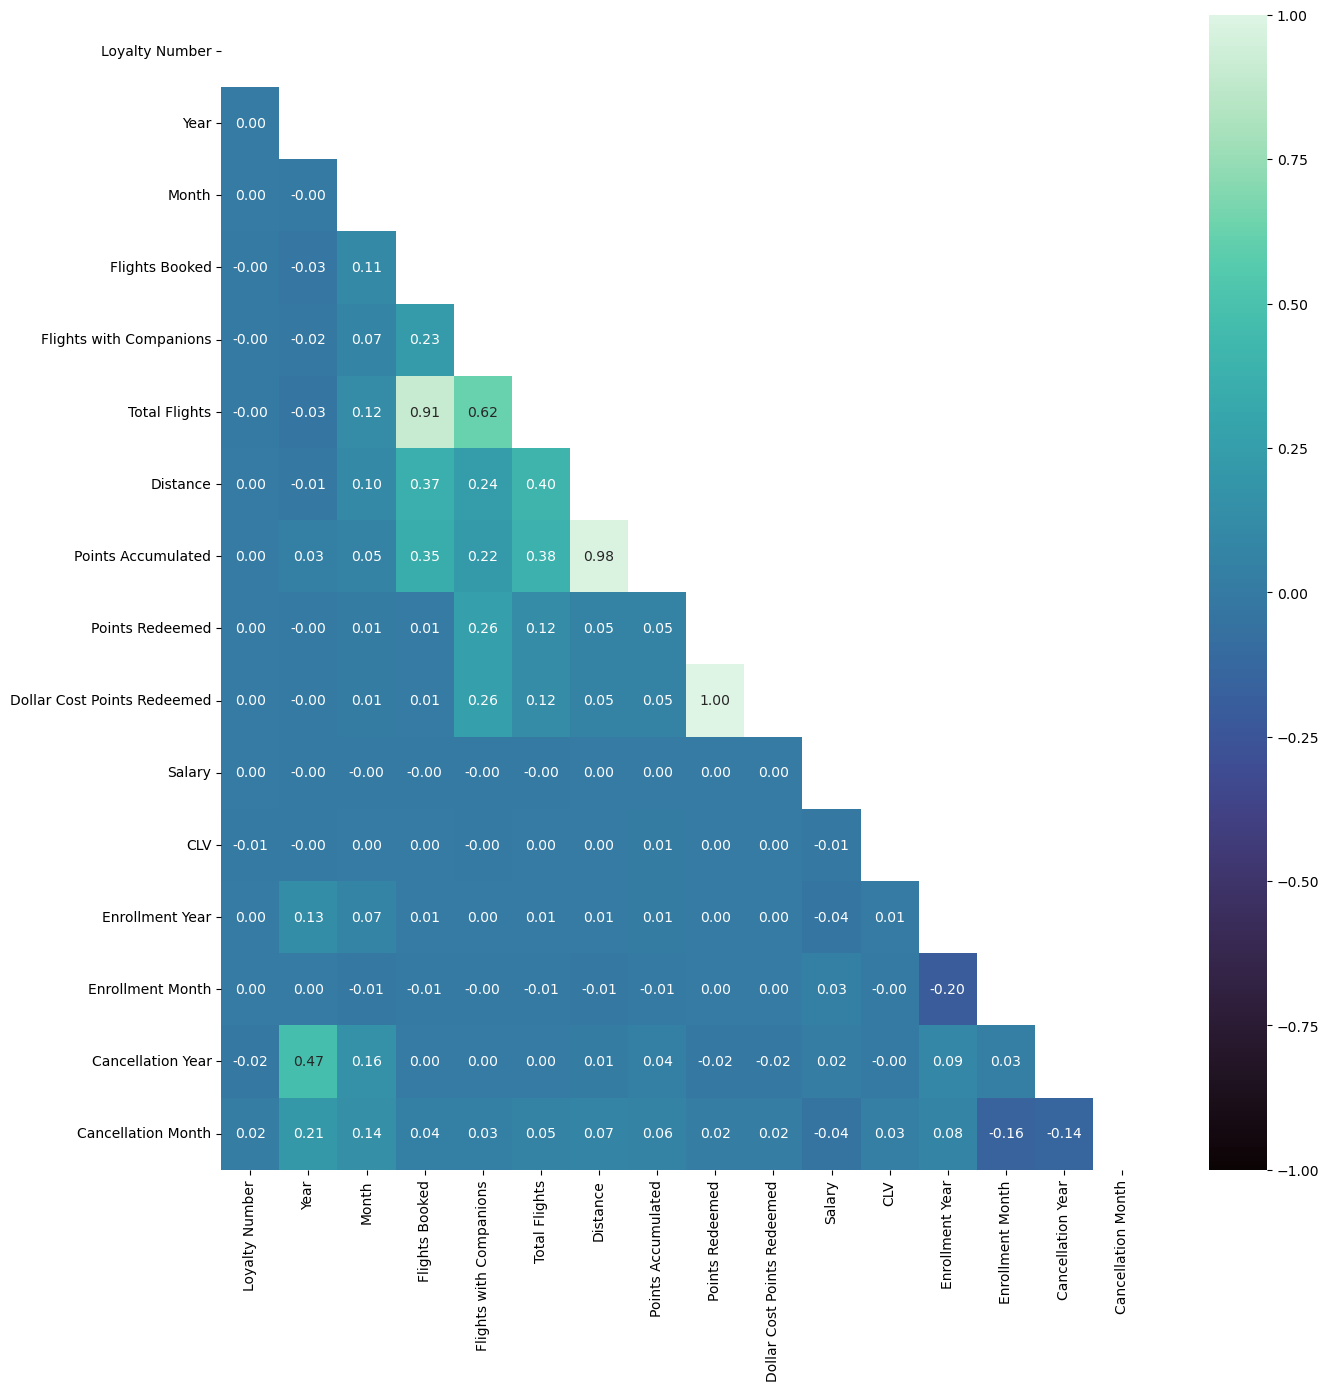

In [20]:
correlacion = df.corr(numeric_only=True)
plt.figure(figsize = (15, 15))

mask = np.triu(np.ones_like(correlacion, dtype=bool))
# creamos un heatmap con la máscara correlación
sns.heatmap(correlacion, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1,
            mask = mask)
plt.savefig("../images/01_correlacion.jpg", format="jpg", dpi=300, bbox_inches="tight");

## ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Vemos que los meses en los que más vuelos se reservan son los que coinciden con el periódo vacacional:
- sobretodo junio, julio y agosto
- le sigue diciembre 
- y después mayo y marzo

Cuando introducimos la variable año, comparando los meses por año, vemos que la tendencia se mantiene en cuanto a los meses estivos y diciembre, y disminuye ligeramente en los primeros meses de 2018.

In [21]:
vuelos_mes = df.groupby("Month")["Flights Booked"].sum().sort_index().reset_index()
vuelos_mes

,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


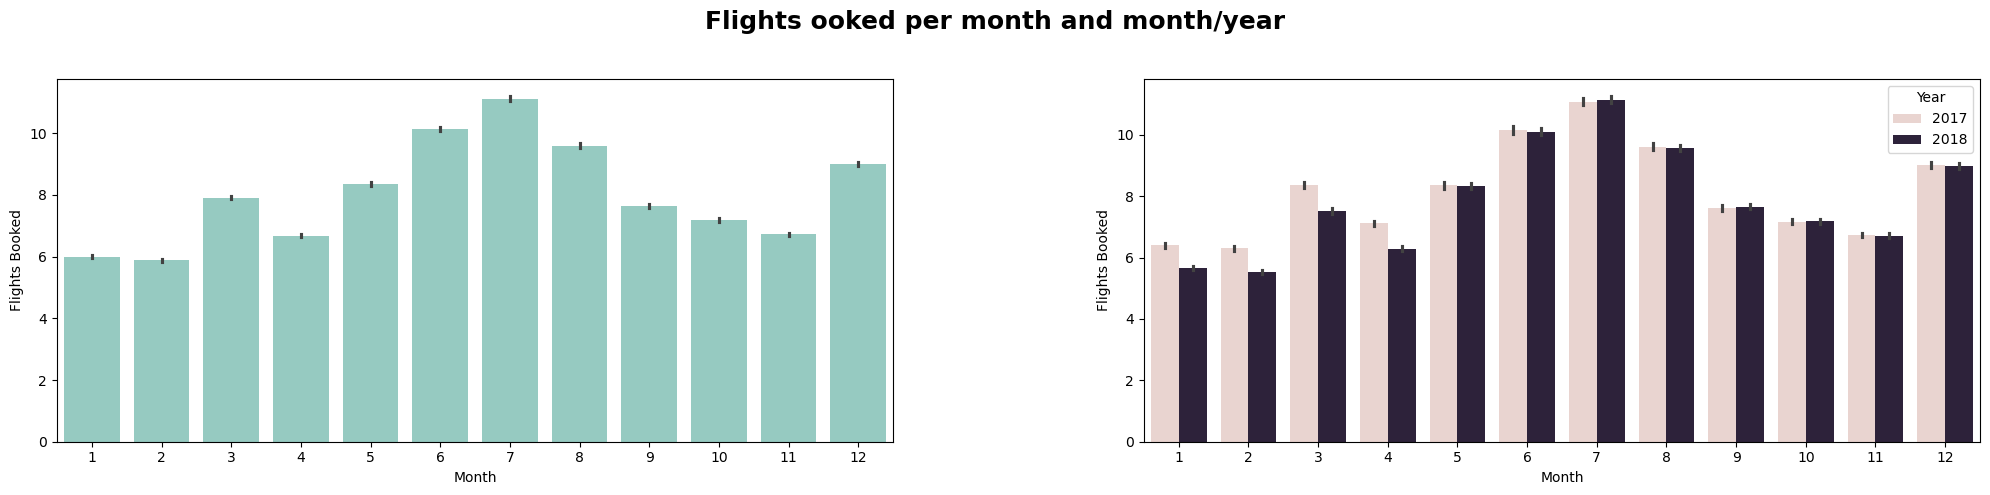

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Flights booked per month and month/year", 
             fontsize=18, fontweight="bold")


sns.barplot(x="Month",
            y="Flights Booked", 
            data=df,
            ax=axes[0])

sns.barplot(x="Month",
            y="Flights Booked", 
            data=df,
            ax=axes[1],
            hue="Year")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../images/02_flights booked per month and month&year.jpg", format="jpg", dpi=300, bbox_inches="tight")


## ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

Consultando la correlación, podemos ver que existe una alta relacion (0.98) entre las variables "Points Accumulated" y "Distance".

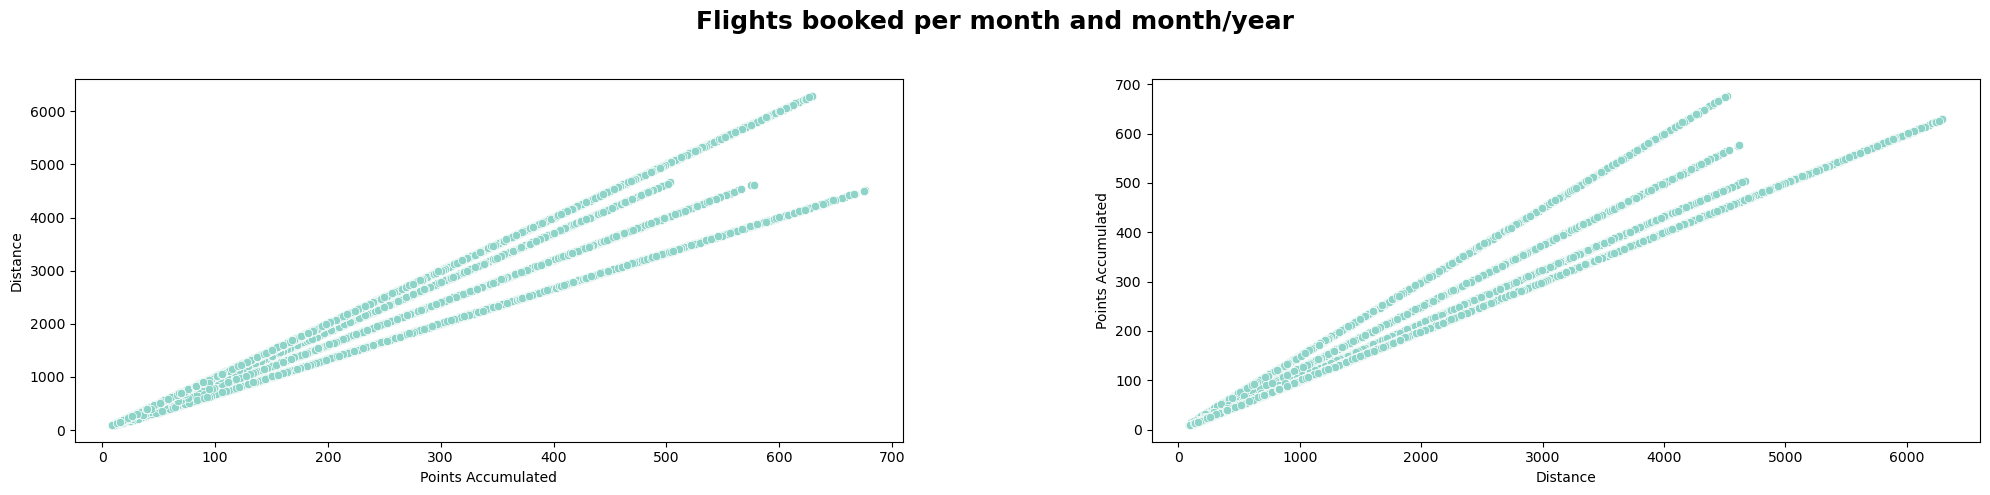

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Flights booked per month and month/year", 
             fontsize=18, fontweight="bold")


sns.scatterplot(x="Points Accumulated",
            y="Distance", 
            data=df,
            ax=axes[0])

sns.scatterplot(y="Points Accumulated",
            x="Distance", 
            data=df,
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
#plt.savefig("../images/02_flights booked per month and month&year.jpg", format="jpg", dpi=300, bbox_inches="tight");
